# Stack Overflow Annual Developer Survey Analysis
    
   Guiding Questions:
    
- **Effects of professional coding experience on average salary**
    
- **Most common way of learning coding**
    
- **Most popular language for each age group**
    
- **The most common degree among developers**

- **Highest paying countries for developer salaries on average**


## Initial Dataset Exploration

In [1]:
# Importing Libraries

#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# read in database

df = pd.read_csv(r"C:\Users\gutie\Downloads\survey_results_public.csv")
df.shape

schema_df = pd.read_csv(r"C:\Users\gutie\Downloads\survey_results_schema.csv")

In [3]:
df.shape

(73268, 79)

In [4]:
pd.set_option('display.max_rows', 85)
pd.set_option('display.max_columns', 85)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [6]:
schema_df

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
6,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR
7,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
8,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR
9,QID276,LearnCode,How did you learn to code? Select all that apply.,False,MC,MAVR


## Effects of professional coding experience on average salary

In [7]:
df_1 = df.copy()

In [8]:
# Replace string such as (Less than 1 year and 'More than 50 years' ) with integers

df_1['YearsCodePro'].replace('Less than 1 year', 0, inplace = True)
df_1['YearsCodePro'].replace('More than 50 years', 51, inplace = True)

In [9]:
# drop N\A values

df_1 = df_1.dropna(subset = ['YearsCodePro'])

In [10]:
# change column datatype to int

df_1['YearsCodePro'] = df_1['YearsCodePro'].astype(int)

In [11]:
# median salary of developers with each year of experience

ExpProCode_grp = df_1.groupby(['YearsCodePro'])['ConvertedCompYearly'].median()
ExpProCode_grp

YearsCodePro
0      29436.0
1      28887.0
2      36576.0
3      43512.0
4      49968.0
5      58654.0
6      66948.0
7      70385.0
8      72651.0
9      76819.5
10     79963.0
11     85315.0
12     84393.5
13     83448.0
14     92000.0
15     92890.0
16     91416.0
17     90647.0
18     99747.5
19    104454.0
20    100000.0
21    106644.0
22    103777.5
23    120000.0
24    106644.0
25    102775.5
26    125319.5
27    106644.0
28    116654.0
29    134331.0
30    124691.0
31    117000.0
32    120000.0
33    145000.0
34    105414.0
35    127972.0
36    106644.0
37    119448.0
38    117500.0
39    175000.0
40    140089.5
41    155000.0
42    134500.0
43    131921.0
44    151000.0
45    145000.0
46    102000.0
47     69102.0
48    157000.0
49    110000.0
50     75384.0
51     90000.0
Name: ConvertedCompYearly, dtype: float64

<AxesSubplot:title={'center':'Median salary per year of experience'}, xlabel='Years Experience', ylabel='Median Salary'>

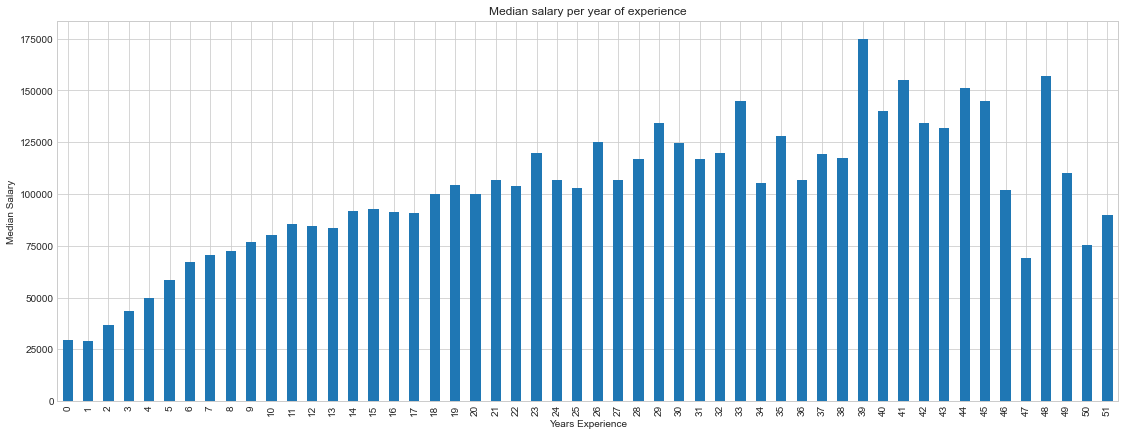

In [12]:
# Graph of median salary of developers for each number of years of experience

plt.style.use("seaborn-whitegrid")
ExpProCode_grp.plot(kind='bar', title='Median salary per year of experience', ylabel='Median Salary',xlabel='Years Experience', figsize=(19, 7))

#plt.xticks(rotation=0, horizontalalignment='center')

## Most common way of learning coding

In [13]:
df_2 = df.copy()

In [14]:
# sum the number of developers that used each method of learning to code

Book = df_2['LearnCode'].str.contains('Books').sum()
Bootcamp = df_2['LearnCode'].str.contains('Bootcamp').sum()
Colleague = df_2['LearnCode'].str.contains('Colleague').sum()
Friend = df_2['LearnCode'].str.contains('Friend').sum()
Hackathon = df_2['LearnCode'].str.contains('Hackathon').sum()
Courses = df_2['LearnCode'].str.contains('Courses').sum()
training = df_2['LearnCode'].str.contains('training').sum()
resources = df_2['LearnCode'].str.contains('resources').sum()
School = df_2['LearnCode'].str.contains('School').sum()

In [15]:
# Drop N\A values from column

df_2 = df_2.dropna(subset = ['LearnCode'])

In [16]:
# X and Y axis

methods_y = [Book, Bootcamp, Colleague, Friend, Hackathon, Courses, training, resources, School]
x = ['Books/Physical media', 'Coding Bootcamp', 'Colleague', 'Friend or family member', 'Hackathons', 
     'Online Courses/Certification', 'On the job training', 'Other online resources', 
     'School']

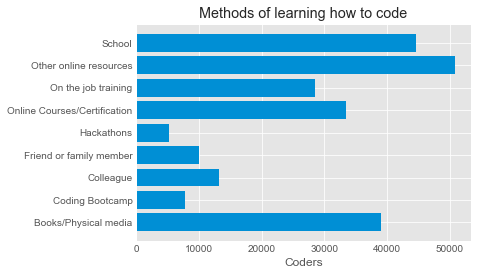

In [17]:
# Graph of the most popular ways to learn how to code

plt.style.use("ggplot")

method_bar = plt.barh(x, methods_y, color="#008fd5")

plt.title('Methods of learning how to code')
plt.xlabel('Coders')
plt.show()

## Most popular language for each age group

In [18]:
df_6 = df.copy()

In [19]:
age_grp = df_6.groupby(['Age'])

In [20]:
# Amount of people per age group that uses Python

age_uses_python = age_grp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
age_uses_python

Age
18-24 years old        9759
25-34 years old       12707
35-44 years old        5536
45-54 years old        1971
55-64 years old         657
65 years or older       173
Prefer not to say       315
Under 18 years old     2646
Name: LanguageHaveWorkedWith, dtype: int64

In [21]:
# Amount of people per age group that uses JavaScript

age_uses_javascript = age_grp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('JavaScript').sum())
age_uses_javascript

Age
18-24 years old       11478
25-34 years old       18463
35-44 years old        8897
45-54 years old        3027
55-64 years old         957
65 years or older       189
Prefer not to say       323
Under 18 years old     2646
Name: LanguageHaveWorkedWith, dtype: int64

In [22]:
# Amount of people per age group that uses SQL

age_uses_sql = age_grp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('SQL').sum())
age_uses_sql

Age
18-24 years old        7983
25-34 years old       13862
35-44 years old        7472
45-54 years old        2994
55-64 years old        1044
65 years or older       224
Prefer not to say       189
Under 18 years old     1063
Name: LanguageHaveWorkedWith, dtype: int64

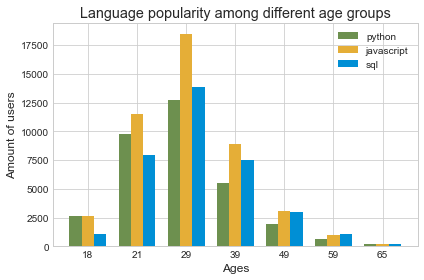

In [23]:
# Graph of the amount of people that uses Python, JavaScript, and SQL in each age group

plt.style.use("seaborn-whitegrid")

ages_x = [18, 21, 29, 39, 49, 59, 65]
x_indexes = np.arange(len(ages_x))
width = 0.25

py_dev_y = [2646, 9759, 12707, 5536, 1971, 657, 173]
plt.bar(x_indexes - width, py_dev_y, width=width, color='#6d904f', label='python')

js_dev_y = [2646, 11478, 18463, 8897, 3027, 957, 189]
plt.bar(x_indexes, js_dev_y, width=width, color='#e5ae37', label='javascript')

sql_dev_y = [1063, 7983, 13862, 7472, 2994, 1044, 224]
plt.bar(x_indexes + width, sql_dev_y, width=width, color='#008fd5', label='sql')

plt.legend()
plt.xticks(ticks=x_indexes, labels=ages_x)
plt.title("Language popularity among different age groups")
plt.xlabel("Ages")
plt.ylabel("Amount of users")
plt.tight_layout()

## The most common degree among developers

In [24]:
df_3 = df.copy()

In [25]:
developer = df_3.groupby(['MainBranch'])

In [26]:
# Current coding situation of Masters Degree holders

masters_developer = developer['EdLevel'].apply(lambda x: x.str.contains('Master').sum())
masters_developer

MainBranch
I am a developer by profession                                                   12817
I am learning to code                                                              363
I am not primarily a developer, but I write code sometimes as part of my work     1681
I code primarily as a hobby                                                        218
I used to be a developer by profession, but no longer am                           407
None of these                                                                        0
Name: EdLevel, dtype: int64

In [27]:
# Current coding situation of Bachelors Degree holders

bachelors_developer = developer['EdLevel'].apply(lambda x: x.str.contains('Bachelor').sum())
bachelors_developer

MainBranch
I am a developer by profession                                                   25630
I am learning to code                                                             1720
I am not primarily a developer, but I write code sometimes as part of my work     1944
I code primarily as a hobby                                                        484
I used to be a developer by profession, but no longer am                           498
None of these                                                                        0
Name: EdLevel, dtype: int64

In [28]:
# Current coding situation of no degree holders

nodegree_developer = developer['EdLevel'].apply(lambda x: x.str.contains('college/university').sum())
nodegree_developer

MainBranch
I am a developer by profession                                                   6638
I am learning to code                                                            1225
I am not primarily a developer, but I write code sometimes as part of my work     666
I code primarily as a hobby                                                       630
I used to be a developer by profession, but no longer am                          167
None of these                                                                       0
Name: EdLevel, dtype: int64

In [29]:
# Current coding situation of Associates Degree holders

associate_developer = developer['EdLevel'].apply(lambda x: x.str.contains('Associate').sum())
associate_developer

MainBranch
I am a developer by profession                                                   1715
I am learning to code                                                             233
I am not primarily a developer, but I write code sometimes as part of my work     163
I code primarily as a hobby                                                        87
I used to be a developer by profession, but no longer am                           38
None of these                                                                       0
Name: EdLevel, dtype: int64

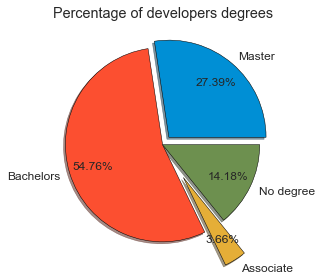

In [30]:
# Graph of degree which has the highest amount of developers

plt.style.use("seaborn-whitegrid")

slices = [12817, 25630, 1715, 6638]
labels = ['Master', 'Bachelors', 'Associate', 'No degree']
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']
explode = [0.1, 0, .4, 0]

plt.pie(slices, labels=labels, explode=explode, shadow=True, autopct='%.2f%%', colors=colors, 
        pctdistance=0.75, textprops={'fontsize':12}, wedgeprops={'edgecolor': 'black'})




plt.title('Percentage of developers degrees')
plt.tight_layout()
plt.show()

## Highest paying countries for developer salaries on average

In [36]:
df_5 = df.copy()

In [37]:
# Drop N\A values in ConvertedCompYearly column

df_5 = df_5.dropna(subset=['ConvertedCompYearly'])

In [38]:
# Amount of people from each country that participated in this survey

v = df_5['Country'].value_counts().head(15)
v

United States of America                                8707
Germany                                                 2912
United Kingdom of Great Britain and Northern Ireland    2657
India                                                   2173
Canada                                                  1481
France                                                  1378
Brazil                                                  1283
Spain                                                    996
Poland                                                   977
Netherlands                                              900
Australia                                                833
Italy                                                    812
Sweden                                                   665
Russian Federation                                       534
Switzerland                                              520
Name: Country, dtype: int64

In [39]:
# Filter out countries that have less than 1000 participants from there

country_filt = df_5[df_5['Country'].isin(v.index[v.gt(1000)])]

In [40]:
# Count number of participants from each remaining country

validcountris = country_filt.groupby(['Country'])

In [41]:
# Get all participants' salaries from the reamaining countries and find the median salary of developers from the country

validcountrismedian = validcountris['ConvertedCompYearly'].median()
validcountrismedian

Country
Brazil                                                   27420.0
Canada                                                   93701.0
France                                                   51192.0
Germany                                                  69318.0
India                                                    18576.0
United Kingdom of Great Britain and Northern Ireland     82922.0
United States of America                                145000.0
Name: ConvertedCompYearly, dtype: float64

<AxesSubplot:ylabel='Country'>

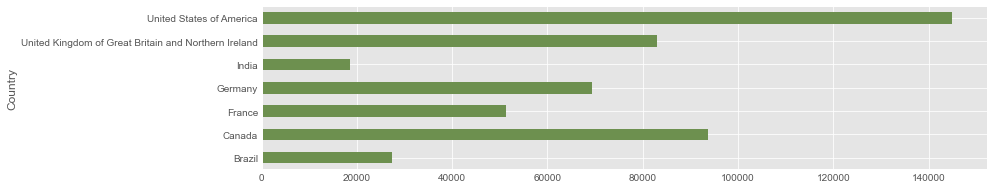

In [42]:
# Graph of the median salaries of developers from each country

plt.style.use("ggplot")

validcountrismedian.plot(kind='barh', figsize=(13, 3), color='#6d904f')